# I_B : Background Currents

In [2]:
# Packages 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Constants

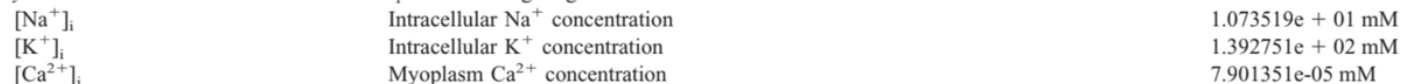

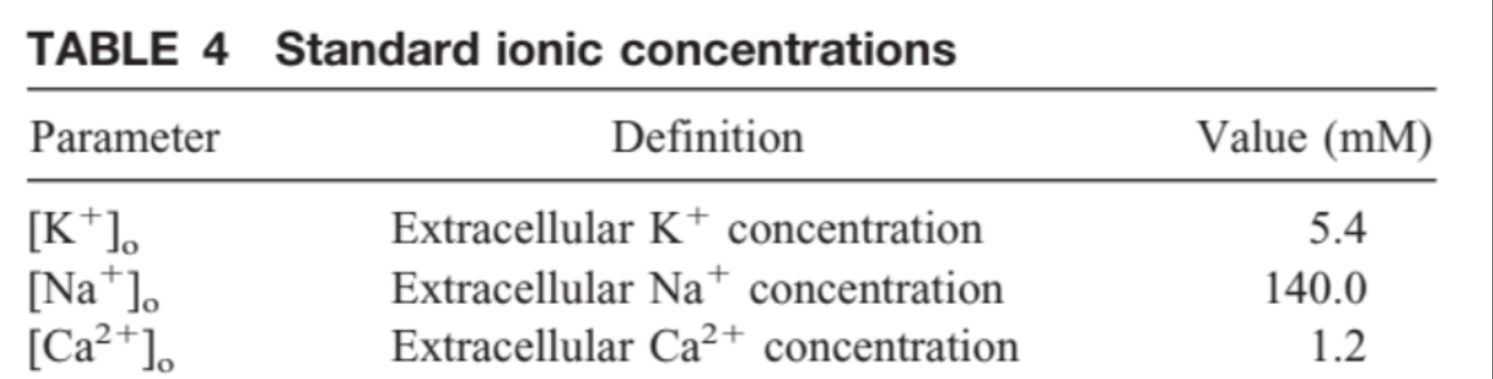

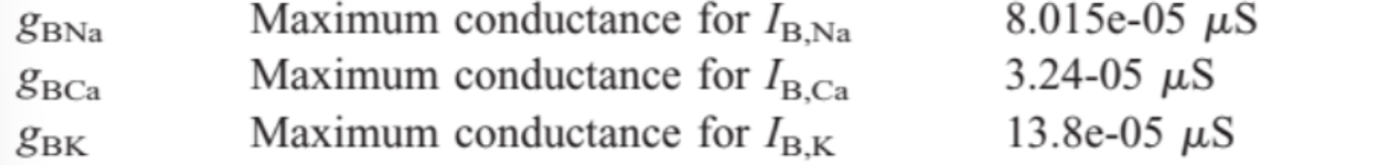

## Background Current Equations

In [3]:
# Concentraions 
Na_i = 10.73519
K_i = 139.2751
Ca_i = 7.901351e-05

Na_o = 140.0
K_o = 5.4
Ca_o = 1.2


In [4]:
# Constants 
g_BNa = 8.015e-05
g_BCa = 3.24e-05
g_BK = 13.8e-05

R = 8.314
T = 310.15
F = 96485

In [5]:
# nernst 
E_Na = (R * T / F) * np.log(Na_o / Na_i) * 1000
E_K = (R * T / F) * np.log(K_o / K_i) * 1000
E_CaL = (R * T / (2 * F)) * np.log(Ca_o / Ca_i) * 1000


In [6]:
def background_currents(V, g_BNa, E_Na, g_BK, E_K, g_BCa, E_CaL):
    I_BNa = g_BNa * (V - E_Na)
    I_BK = g_BK * (V - E_K)
    I_BCa = g_BCa * (V - E_CaL)
    I_B = I_BNa + I_BCa + I_BK
    return I_BNa, I_BK, I_BCa, I_B

### Solving

In [9]:

V_range = np.linspace(-60, 60, 100)

# Initialising arrays 
I_BNa_values = []
I_BK_values = []
I_BCa_values = []
I_B_values = []

for V in V_range:
    I_BNa, I_BK, I_BCa, I_B = background_currents(V, g_BNa, E_Na, g_BK, E_K, g_BCa, E_CaL)
    I_BNa_values.append(I_BNa)
    I_BK_values.append(I_BK)
    I_BCa_values.append(I_BCa)
    I_B_values.append(I_B)


### Plotting


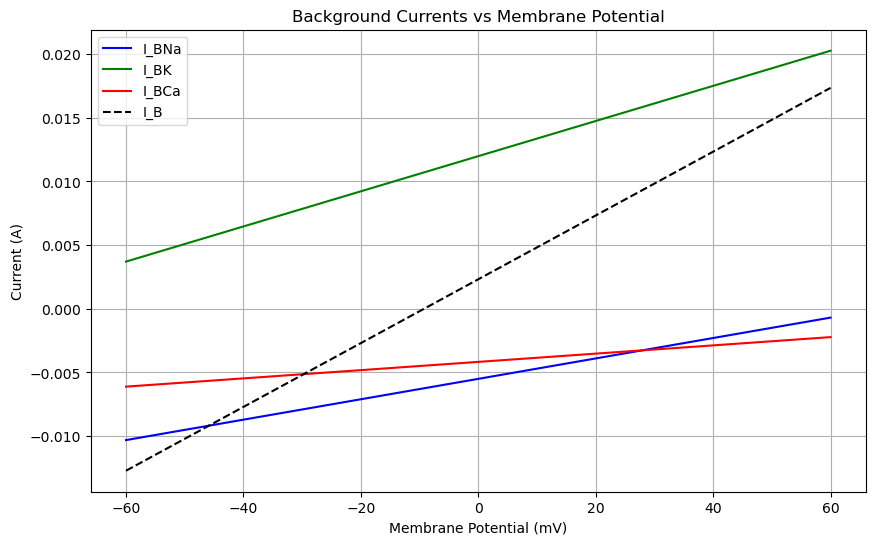

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(V_range, I_BNa_values, label='I_BNa', color='blue')
plt.plot(V_range, I_BK_values, label='I_BK', color='green')
plt.plot(V_range, I_BCa_values, label='I_BCa', color='red')
plt.plot(V_range, I_B_values, label='I_B', color='black', linestyle='--')
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Current (A)')
plt.title('Background Currents vs Membrane Potential')
plt.legend()
plt.grid(True)
plt.show()